# Are there other planets in the TESS lightcurve?

Let's find out.  

gully, Nov 2022

In [1]:
import exoplanet as xo

xo.utils.docs_setup()
print(f"exoplanet.__version__ = '{xo.__version__}'")

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


exoplanet.__version__ = '0.5.3'


In [2]:
%config InlineBackend.figure_format='retina'

# Datasets and initializations

First, let's download the long cadence light curves from MAST using the `lightkurve` package.

In [3]:
%config Completer.use_jedi = False

In [4]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

In [5]:
sr = lk.search_lightcurve('HAT-P-67', author='SPOC')

In [6]:
sr

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 24,2020,SPOC,120,198588220,0.0
1,TESS Sector 26,2020,SPOC,120,198588220,0.0
2,TESS Sector 51,2022,SPOC,120,198588220,0.0
3,TESS Sector 52,2022,SPOC,120,198588220,0.0
4,TESS Sector 53,2022,SPOC,120,198588220,0.0


We only want the two-minute cadence lightcurves.

In [7]:
lcs = sr.download_all()
lc = lcs.stitch().normalize().remove_nans()

In [8]:
lc_flat = lc.flatten()

(2720.0, 2730.0)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findf

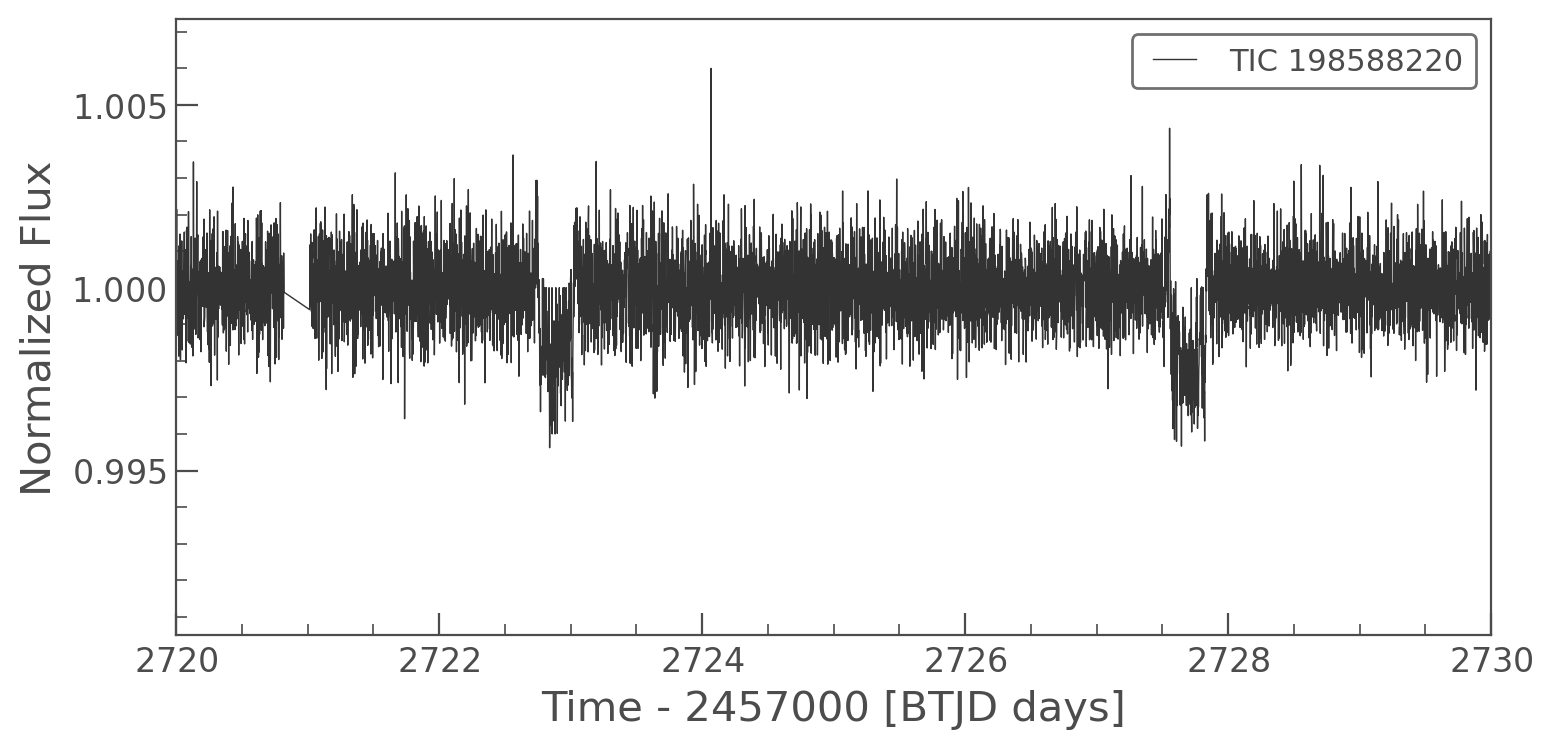

In [9]:
ax = lc_flat.plot()
ax.set_xlim(2720, 2730)

In [10]:
lc_flat.interact_bls()